<h1><center><font size=8>AIML - Project 5 - Credit Card Users Churn Prediction</center></font></h1>
<center><img src="https://cdn-images-1.medium.com/max/1600/1*ZDa8yIJ_toq2r0zzQQ4fVA.jpeg" width="400" height="300"></center>

## Problem Statement

### Context:

The Thera bank recently saw a steep decline in the number of users of their credit card, Credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance


### Objective:
- Explore and visualize the dataset.
- Build a classification model to predict if the customer is going to churn or not
- Optimize the model using appropriate techniques
- Generate a set of insights and recommendations that will help the bank

### Data Description:
- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

###  Importing Libraries 

In [ ]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")



## Reading the dataset

In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading data from excel and copying in another dataframe
originalData = pd.read_csv("/content/drive/My Drive/Python Learning/Projects/Project5/BankChurners.csv")
data = originalData

###    Data Overview 

In [ ]:
# let's view the first 5 rows of the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
# let's view the first 5 rows of the data
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Data Analysis

In [ ]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

####  Observations 
* There are 10127 rows and 20 columns. 
* All the columns have 10127 non-null values except Education_Level and Gender which has missing values.  

####  Check for duplicate values 

In [ ]:
data.duplicated().sum()

0

* There are no duplicates in data.  

####   Check for percentage of missing values 

In [ ]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64


- Education Level has 15% missing values. We will further explore to treat them. 
- Marital Status Level has 7.5% missing values. We will further explore to treat them. 

####  Statistical summary 

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


#####  Observations 
- `Customer Age` is varying from 26 years to 73 years which 75% at around 52 years. 
- Columns - `Credit Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Trans_Amt` is right skewed as max value is much higher than 50%.
- Columns - `Credit Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Trans_Amt, Total_Trans_Ct` might have outliers on the right end as there is a large difference between 75th percentile and maximum values.


####  Categorical and Numerical Data Analysis

In [ ]:
# Get  columns whose data type is object i.e. string
objectColumns = data.dtypes[data.dtypes == np.object]
# list of columns whose data type is object i.e. string
listOfobjectColumns = list(objectColumns.index)
print(listOfobjectColumns)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [ ]:
# List of numerical columns
objectColumns = data.dtypes[data.dtypes != np.object]
# list of columns whose data type is notobject i.e. string
listOfobjectColumns = list(objectColumns.index)
print(listOfobjectColumns)

['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [ ]:
#Qualitfied few objects columns and added some nueric boolean columns which seens like categories to get unique value counts 
categorical_cols=['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

numerical_cols = [ 
 'Customer_Age', 
 'Dependent_count', 
 'Months_on_book', 
 'Total_Relationship_Count', 
 'Months_Inactive_12_mon', 
 'Contacts_Count_12_mon', 
 'Credit_Limit', 
 'Total_Revolving_Bal', 
 'Avg_Open_To_Buy', 
 'Total_Amt_Chng_Q4_Q1', 
 'Total_Trans_Amt', 
 'Total_Trans_Ct', 
 'Total_Ct_Chng_Q4_Q1', 
 'Avg_Utilization_Ratio']



In [ ]:
#Analyze values for Categorcal columns
for column in categorical_cols:
    print(data[column].value_counts())
    print('-'*50)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
--------------------------------------------------


#####  Observations 
- `Income_Category` has a category of 'abc'. This category doesn't seems right and need to be fixed. We may reppace this with most_frequent (mode) value.
- All other categories data seems to be well defined. This will allow one hot encoding easy and may not cause many columns. 

#### Encoding Target Variable

In [ ]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

**Common funtions to carry out the EDA.**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

###   Univariate EDA on Numerical variables  

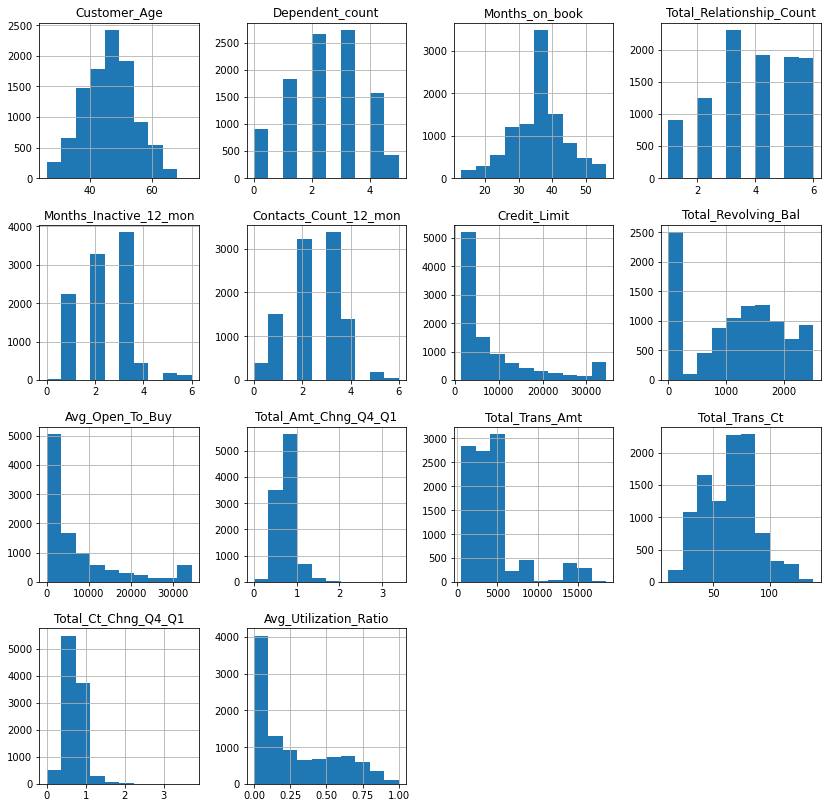

In [ ]:
# creating histograms
data[numerical_cols].hist(figsize=(14, 14))
plt.show()

####  Observations  
* The `Customer Age, Months_on_book` distribution is close to normal.
* The distribution of `Credit_Limit, Avg_Open_To_Buy, Avg_Utilization_Ratio` is right skewed.



###   Univariate EDA on Categorical variables  

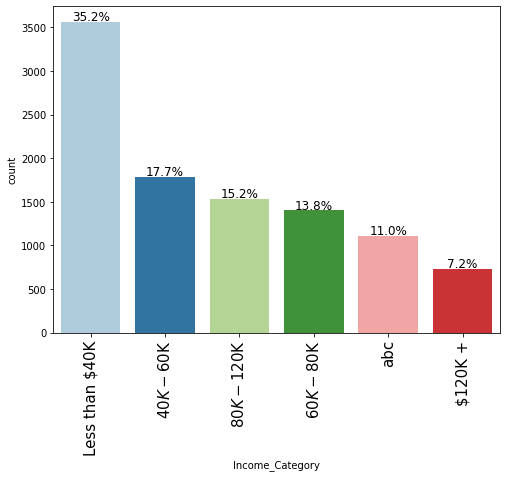

In [ ]:
labeled_barplot(data,'Income_Category',perc=True) #Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'

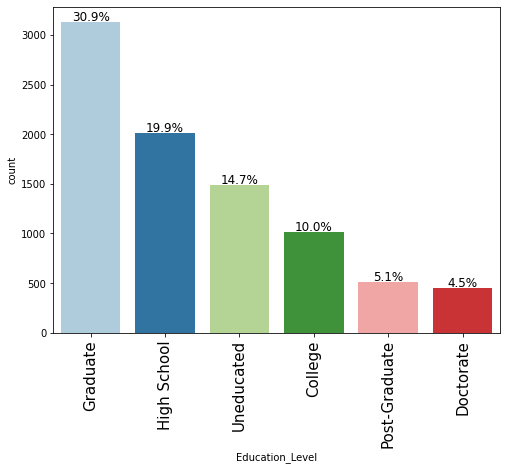

In [ ]:
labeled_barplot(data,'Education_Level',perc=True)

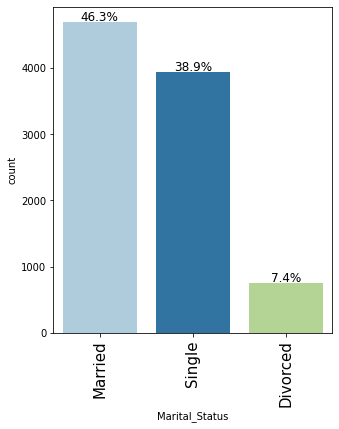

In [ ]:
labeled_barplot(data,'Marital_Status',perc=True)

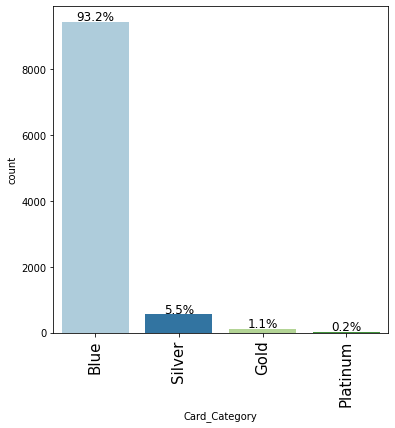

In [ ]:
labeled_barplot(data,'Card_Category',perc=True)

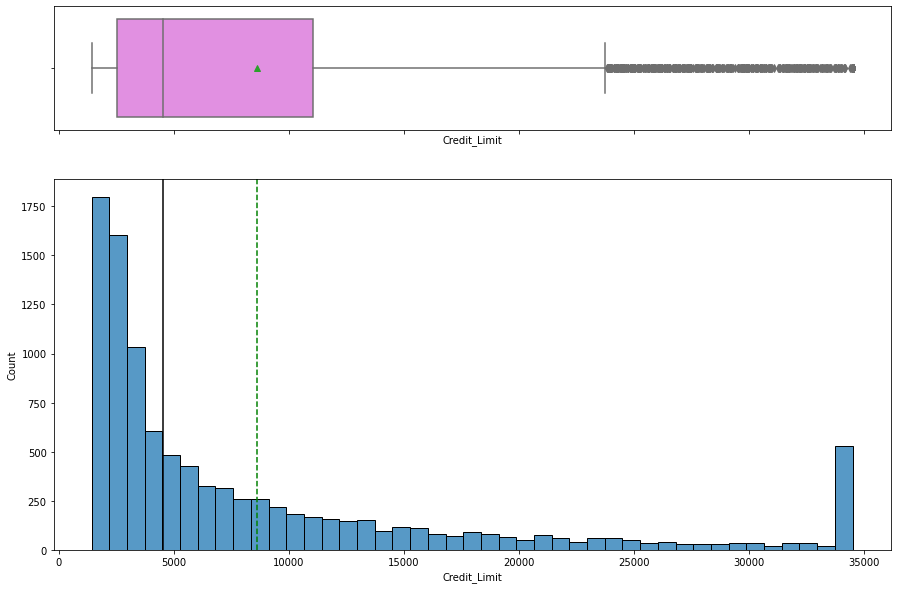

In [ ]:
histogram_boxplot(data,'Credit_Limit')

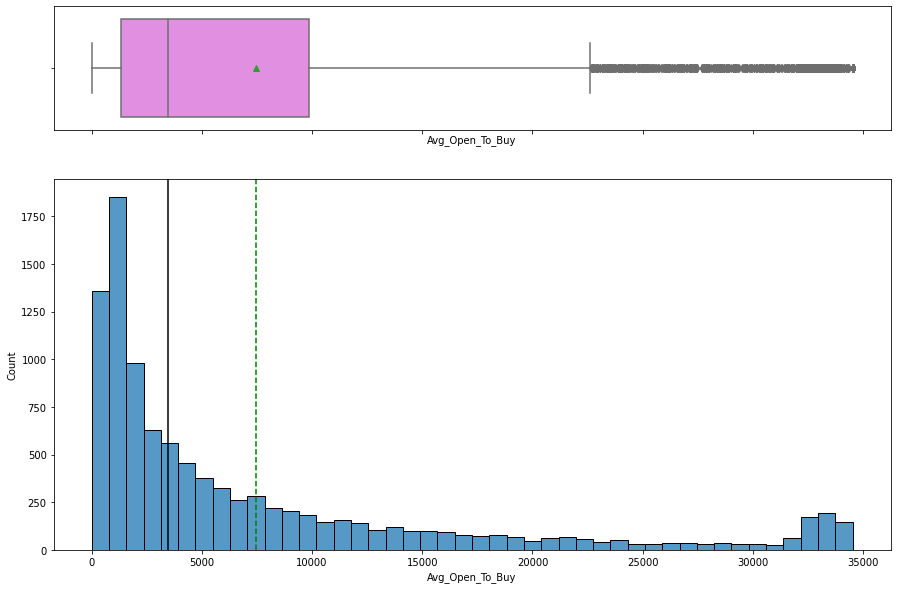

In [ ]:
histogram_boxplot(data,'Avg_Open_To_Buy')

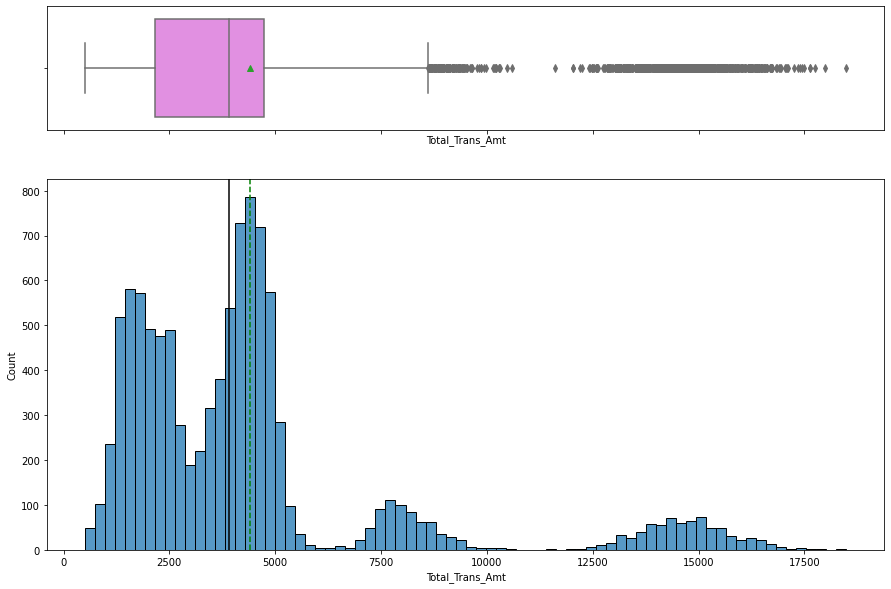

In [ ]:
histogram_boxplot(data,'Total_Trans_Amt')

####  Observations 
* Majority population in dataset has Income_Category less than 40K.
* Data has good mix of Married and Single Marital Status data points
* Blue is Card Category is owned by largest number of customer base - 93.2%


###   Bivariate EDA  

####   Correlation Plot 

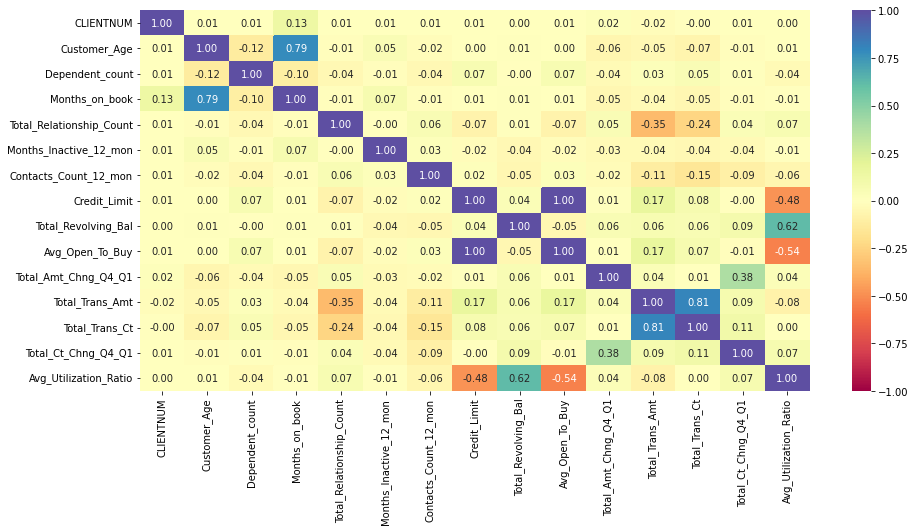

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* High correlation between Total_Revolving_Bal and Avg_Utilization_Ratio

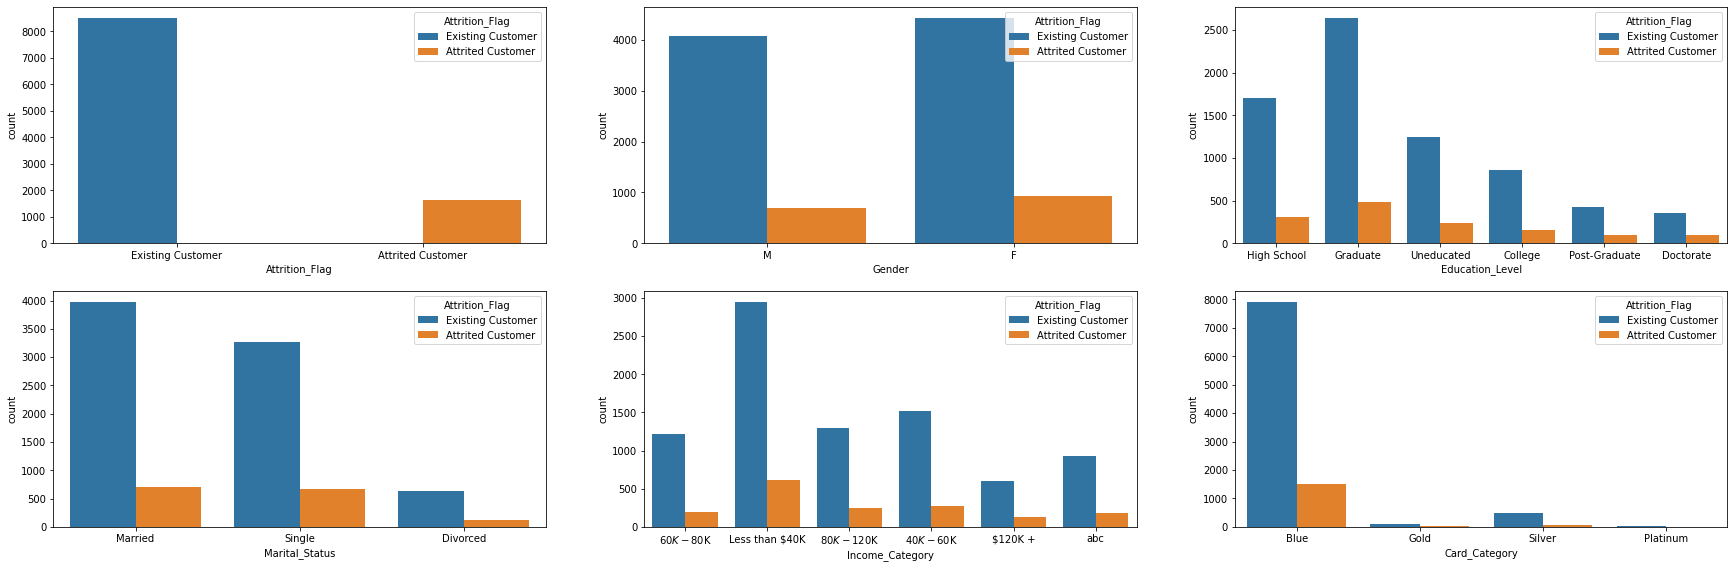

In [ ]:
#Analyzing categorical column relation with Attrition_Flag
plt.figure(figsize=(30,20))
pos = 1
for i in categorical_cols:
    plt.subplot(4, 3, pos)
    sns.countplot(x=data[i], hue="Attrition_Flag", data=data)
    pos += 1

####  Observations 
* Dataset has more Existing Customer data compare to Attrited Customers. 
* Ratio of Female customer attrition is more compared to male customer. 
* In Income_Category less than 40K, there are more attrition. Reason may be because there are more customer in that income category range. 


In [ ]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

**Let's check the relationship between response and Numerical variables**

In [ ]:
# Mean of numerical variables grouped by attrition
data.groupby(["Attrition_Flag"])[numerical_cols].mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,
Attrited Customer,46.659,2.403,36.178,3.280,2.693,2.972,8136.039,672.823,7463.216,0.694,3095.026,44.934,0.554,0.162
Existing Customer,46.262,2.335,35.881,3.915,2.274,2.356,8726.878,1256.604,7470.273,0.773,4654.656,68.673,0.742,0.296


####  EDA Summary 
* There are 10127 rows and 20 columns. 
* All the columns have 10127 non-null values except Education_Level and Gender which has missing values.  
* There are no duplicates in data.  
* Education Level has 15% missing values. We will further explore to treat them. 
* Marital Status Level has 7.5% missing values. We will further explore to treat them. 

- `Customer Age` is varying from 26 years to 73 years which 75% at around 52 years. 
- Columns - `Credit Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Trans_Amt` is right skewed as max value is much higher than 50%.
- Columns - `Credit Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Trans_Amt, Total_Trans_Ct` might have outliers on the right end as there is a large difference between 75th percentile and maximum values.
- `Income_Category` has a category of 'abc'. This category doesn't seems right and need to be fixed. We may replace this with most_frequent (mode) value.
* Majority population in dataset has Income_Category less than 40K.
* Data has good mix of Married and Single Marital Status data points
* Blue is Card Category is owned by largest number of customer base - 93.2%
* High correlation between Total_Revolving_Bal and Avg_Utilization_Ratio
* Dataset has more Existing Customer data compare to Attrited Customers. 
* Ratio of Female customer attrition is more compared to male customer. 
* In Income_Category less than 40K, there are more attrition. Reason may be because there are mosre customer in that income category range. 

##  Data Processing  

### Outlier Detection

Some of the commonly methods to deal with the data points that we actually flag as outliers are:

* Replacement with null values - We can consider these data points as missing data and replace the abnormal values with NaNs.
* IQR method - Replace the data points with the lower whisker (Q1 - 1.5 * IQR) or upper whisker (Q3 + 1.5 * IQR) value.
* We can also drop these observations, but we might end up with losing other relevant observations as well.

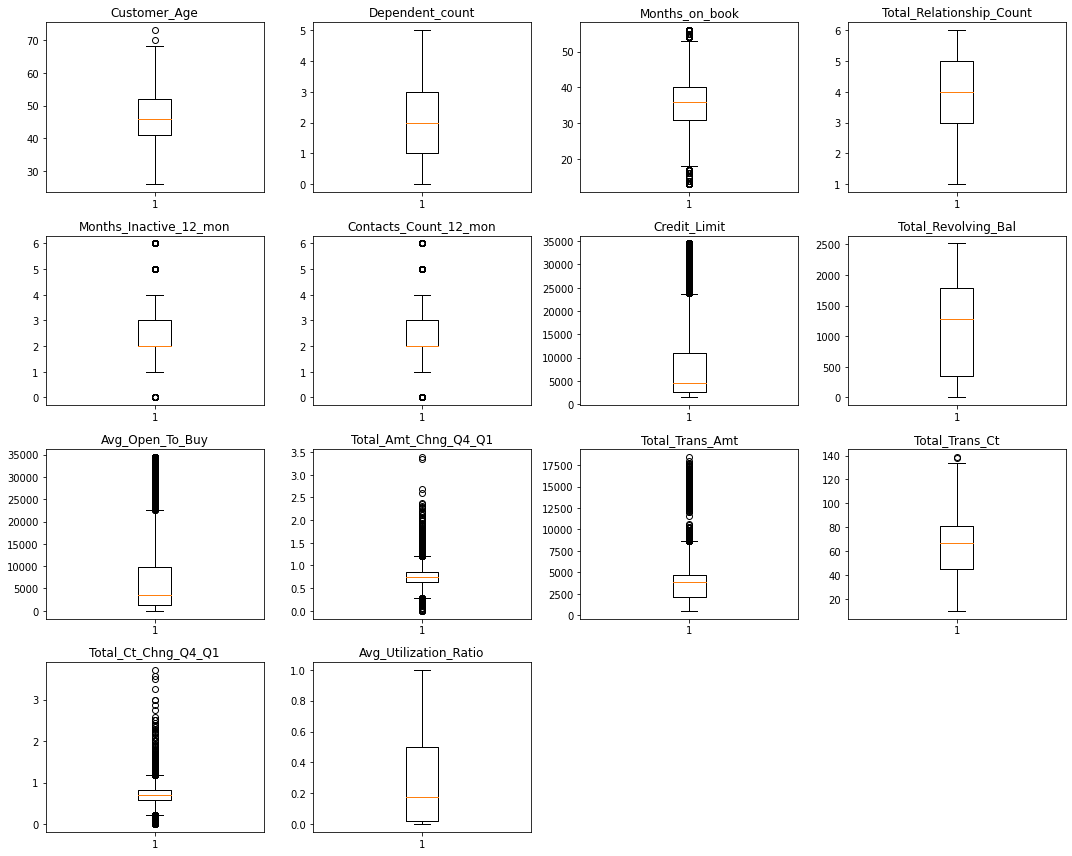

In [ ]:
# outlier detection using boxplot
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [ ]:
# Percentage of outliers in each column
((data[numerical_cols] < lower_whisker) | (data[numerical_cols] > upper_whisker)).sum()/data.shape[0]*100

Customer_Age               0.020
Dependent_count            0.000
Months_on_book             3.812
Total_Relationship_Count   0.000
Months_Inactive_12_mon     3.268
Contacts_Count_12_mon      6.211
Credit_Limit               9.717
Total_Revolving_Bal        0.000
Avg_Open_To_Buy            9.509
Total_Amt_Chng_Q4_Q1       3.910
Total_Trans_Amt            8.848
Total_Trans_Ct             0.020
Total_Ct_Chng_Q4_Q1        3.891
Avg_Utilization_Ratio      0.000
dtype: float64

* Credit_Limit, Avg_Open_To_Buy,Total_Trans_Amt and Contacts_Count_12_mon have more % of outlier. We can consider treating these values as part of outlier treatment. 
* Credit_Limit and Total_Trans_Amt with log transformation. 
* Avg_Open_To_Buy and Contacts_Count_12_mon using IQR.

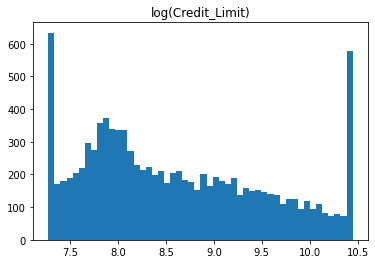

In [ ]:
# Checking log transformation for Credit_Limit. 
plt.hist(np.log(data['Credit_Limit'] ), 50)
plt.title('log(Credit_Limit)')
plt.show()

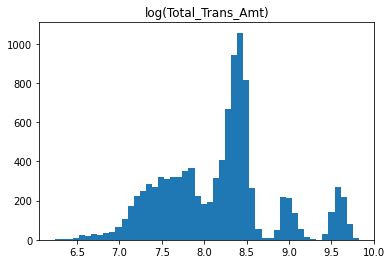

In [ ]:
# Checking log transformation for Total_Trans_Amt. 
plt.hist(np.log(data['Total_Trans_Amt'] ), 50)
plt.title('log(Total_Trans_Amt)')
plt.show()

###**Treating outliers**

We will cap/clip the minimum and maximum value of these columns to the lower and upper whisker value of the boxplot found using  **Q1 - 1.5*IQR** and **Q3 + 1.5*IQR**, respectively.

In [ ]:
# reapplying the log transform to the Credit_Limit column.
data["Credit_Limit_log"] = np.log(data['Credit_Limit'])
# dropping the redundant columns
data.drop(columns=["Credit_Limit"], inplace=True)

In [ ]:
# reapplying the log transform to the Total_Trans_Amt column.
data["Total_Trans_Amt_log"] = np.log(data['Total_Trans_Amt'])
# dropping the redundant columns
data.drop(columns=["Total_Trans_Amt"], inplace=True)

In [ ]:
def treat_outliers(df_noMissingValue, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df_noMissingValue[col].quantile(0.25)  # 25th quantile
    Q3 = df_noMissingValue[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df_noMissingValue[col] = np.clip(df_noMissingValue[col], lower_whisker, upper_whisker)

    return df_noMissingValue

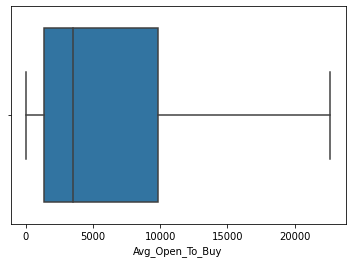

In [ ]:
data = treat_outliers(data,'Avg_Open_To_Buy')

# visualizing the column after outlier treatment
sns.boxplot(data=data,x='Avg_Open_To_Buy')
plt.show()

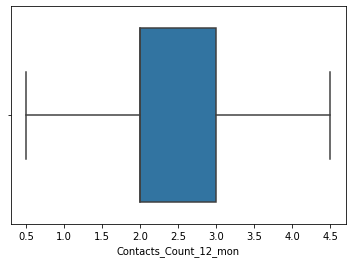

In [ ]:
data = treat_outliers(data,'Contacts_Count_12_mon')

# visualizing the column after outlier treatment
sns.boxplot(data=data,x='Contacts_Count_12_mon')
plt.show()

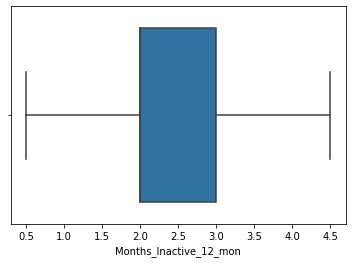

In [ ]:
data = treat_outliers(data,'Months_Inactive_12_mon')

# visualizing the column after outlier treatment
sns.boxplot(data=data,x='Months_Inactive_12_mon')
plt.show()

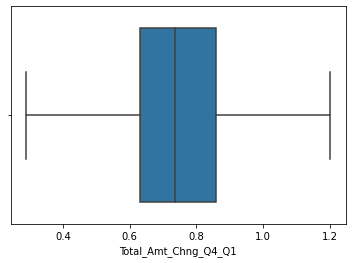

In [ ]:
data = treat_outliers(data,'Total_Amt_Chng_Q4_Q1')

# visualizing the column after outlier treatment
sns.boxplot(data=data,x='Total_Amt_Chng_Q4_Q1')
plt.show()

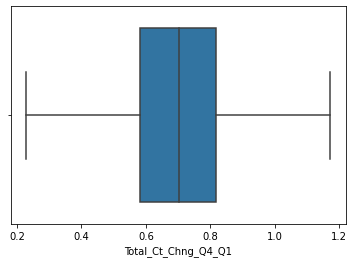

In [ ]:
data = treat_outliers(data,'Total_Ct_Chng_Q4_Q1')

# visualizing the column after outlier treatment
sns.boxplot(data=data,x='Total_Ct_Chng_Q4_Q1')
plt.show()

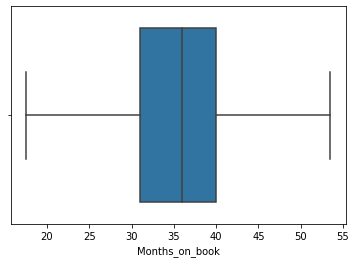

In [ ]:
data = treat_outliers(data,'Months_on_book')

# visualizing the column after outlier treatment
sns.boxplot(data=data,x='Months_on_book')
plt.show()

*  Check Outlier after treatment

In [ ]:
numerical_cols = [ 
 'Customer_Age', 
 'Dependent_count', 
 'Months_on_book', 
 'Total_Relationship_Count', 
 'Months_Inactive_12_mon', 
 'Contacts_Count_12_mon', 
 'Credit_Limit_log', 
 'Total_Revolving_Bal', 
 'Avg_Open_To_Buy', 
 'Total_Amt_Chng_Q4_Q1', 
 'Total_Trans_Amt_log', 
 'Total_Trans_Ct', 
 'Total_Ct_Chng_Q4_Q1', 
 'Avg_Utilization_Ratio']

In [ ]:
# Percentage of outliers in each column
((data[numerical_cols] < lower_whisker) | (data[numerical_cols] > upper_whisker)).sum()/data.shape[0]*100

Avg_Open_To_Buy            0.000
Avg_Utilization_Ratio      0.000
Contacts_Count_12_mon      0.000
Credit_Limit               0.000
Credit_Limit_log           0.000
Customer_Age               0.020
Dependent_count            0.000
Months_Inactive_12_mon     0.000
Months_on_book             0.000
Total_Amt_Chng_Q4_Q1       0.000
Total_Ct_Chng_Q4_Q1        0.000
Total_Relationship_Count   0.000
Total_Revolving_Bal        0.000
Total_Trans_Amt            0.000
Total_Trans_Amt_log        0.000
Total_Trans_Ct             0.020
dtype: float64

In [ ]:
# saving the dataset with all outliers treated in seperate file. This will allow further processing with this data.
data.to_csv('/content/drive/My Drive/Python Learning/Projects/Project5/BankChurners_noOutliers.csv',index=False)

* Start working on new dataframe after removing outliers

In [ ]:
# Read new file after outlier treatment.
data_noOutliers = pd.read_csv('/content/drive/My Drive/Python Learning/Projects/Project5/BankChurners_noOutliers.csv')
# checking the shape of the data
print(f"There are {data_noOutliers.shape[0]} rows and {data_noOutliers.shape[1]} columns.")  # f-string

There are 10127 rows and 21 columns.


In [ ]:
data_noOutliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  float64
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  float64
 12  Contacts_Count_12_mon     10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
# Checking income category colum which was analyzed in Data analysis.
print(data_noOutliers['Income_Category'].value_counts())

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64


* Income_Category has a category of 'abc'. This category doesn't seems right and need to be fixed. We may replace this with most_frequent (mode) value.

In [ ]:
# First replace Income_Category has a category of 'abc' to na. And then later as part of missing value treatment, we can replace na. 
data_noOutliers['Income_Category'] = data_noOutliers['Income_Category'].replace('abc', np.nan, inplace=True)

In [ ]:
print(data_noOutliers['Income_Category'].value_counts())

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64


- We can drop the column - `CLIENTNUM` as it is unique for each customer and will not add value to the model.

In [ ]:
data_noOutliers.isna().sum()

In [ ]:
# dropping CLIENTNUM. This column is not required for modelling
data_noOutliers.drop(columns=["CLIENTNUM"], inplace=True)

In [ ]:
#Check data for target variable.
data_noOutliers['Attrition_Flag'].value_counts(normalize=True)

Existing Customer   0.839
Attrited Customer   0.161
Name: Attrition_Flag, dtype: float64

- Based on `Attrition_Flag` distribution, data is impbalance with majority class as Existing Customer.

In [ ]:
# saving the dataset with all the missing values treated
data_noOutliers.to_csv('/content/drive/My Drive/Python Learning/Projects/Project5/BankChurners_finalForModel.csv',index=False)

### Split data

In [ ]:
# Read new file after outlier treatment.
data_finalForModel = pd.read_csv('/content/drive/My Drive/Python Learning/Projects/Project5/BankChurners_finalForModel.csv')
# Creating one more copy of data which will be used later for creating pipeline
data_forPipeline = data_finalForModel.copy()
# checking the shape of the data
print(f"There are {data_finalForModel.shape[0]} rows and {data_finalForModel.shape[1]} columns.")  # f-string

There are 10127 rows and 20 columns.


In [ ]:
data_finalForModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  float64
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  float64
 11  Contacts_Count_12_mon     10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [ ]:
# Checking missing value columns before using this data for modelling.
round(data_finalForModel.isnull().sum() / data_finalForModel.isnull().count() * 100, 2)

Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category            10.980
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
Credit_Limit_log            0.000
Total_Trans_Amt_log         0.000
dtype: float64

In [ ]:
data_finalForModel[data_finalForModel["Education_Level"].isnull()]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit_log,Total_Trans_Amt_log
6,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46.000,6,1.000,3.000,2264,22660.750,1.201,31,0.722,0.066,10.449,7.193
11,Existing Customer,65,M,1,NaN,Married,$40K - $60K,Blue,53.500,6,2.000,3.000,1587,7508.000,1.201,26,1.172,0.174,9.115,7.181
15,Existing Customer,44,M,4,NaN,NaN,$80K - $120K,Blue,37.000,5,1.000,2.000,972,3262.000,1.201,27,1.172,0.230,8.351,7.206
17,Existing Customer,41,M,3,NaN,Married,$80K - $120K,Blue,34.000,4,4.000,1.000,1291,12244.000,0.653,21,1.172,0.095,9.513,6.935
23,Existing Customer,47,F,4,NaN,Single,Less than $40K,Blue,36.000,3,3.000,2.000,1560,932.000,0.573,23,0.353,0.626,7.821,7.026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,Existing Customer,36,F,3,NaN,Married,$40K - $60K,Blue,22.000,5,3.000,3.000,2273,10685.000,0.608,96,0.627,0.175,9.469,9.660
10094,Existing Customer,59,M,1,NaN,Single,$60K - $80K,Blue,48.000,3,1.000,2.000,0,7288.000,0.640,120,0.714,0.000,8.894,9.607
10095,Existing Customer,46,M,3,NaN,Married,$80K - $120K,Blue,33.000,4,1.000,3.000,1099,22660.750,0.816,110,0.618,0.032,10.449,9.648
10118,Attrited Customer,50,M,1,NaN,NaN,$80K - $120K,Blue,36.000,6,3.000,4.000,952,9007.000,0.825,63,1.100,0.096,9.206,9.241


In [ ]:
data_finalForModel[data_finalForModel["Income_Category"].isnull()]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit_log,Total_Trans_Amt_log
19,Existing Customer,45,F,2,Graduate,Married,NaN,Blue,37.000,6,1.000,2.000,1157,13313.000,0.966,21,0.909,0.080,9.580,7.096
28,Existing Customer,44,F,3,Uneducated,Single,NaN,Blue,34.000,5,2.000,2.000,0,10100.000,0.525,18,1.172,0.000,9.220,6.958
39,Attrited Customer,66,F,0,Doctorate,Married,NaN,Blue,53.500,5,4.000,3.000,605,7277.000,1.052,16,0.228,0.077,8.972,6.557
44,Existing Customer,38,F,4,Graduate,Single,NaN,Blue,28.000,2,3.000,3.000,2055,7775.000,0.977,23,0.917,0.209,9.193,6.949
58,Existing Customer,44,F,5,Graduate,Married,NaN,Blue,35.000,4,1.000,2.000,978,5295.000,1.201,25,1.083,0.156,8.744,7.215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,Attrited Customer,30,F,1,Graduate,Married,NaN,Blue,18.000,4,1.000,4.000,2517,1860.000,0.941,74,0.609,0.575,8.384,9.078
10040,Attrited Customer,50,F,3,Doctorate,Single,NaN,Blue,36.000,4,3.000,3.000,0,5173.000,0.912,68,0.789,0.000,8.551,9.078
10083,Existing Customer,42,F,4,Uneducated,Married,NaN,Blue,23.000,4,1.000,2.000,0,8348.000,0.695,111,0.708,0.000,9.030,9.674
10092,Attrited Customer,40,F,3,Graduate,Married,NaN,Blue,25.000,1,2.000,3.000,1878,5010.000,1.059,64,0.829,0.273,8.838,9.109


In [ ]:
# separating the independent and dependent variables
X = data_finalForModel.drop(["Attrition_Flag"], axis=1)
y = data_finalForModel["Attrition_Flag"]

In [ ]:
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit_log,Total_Trans_Amt_log,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39.000,5,1.000,3.000,777,11914.000,1.201,42,1.172,0.061,9.449,7.042,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,49,5,44.000,6,1.000,2.000,864,7392.000,1.201,33,1.172,0.105,9.019,7.163,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,51,3,36.000,4,1.000,0.500,0,3418.000,1.201,20,1.172,0.000,8.137,7.543,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,40,4,34.000,3,4.000,1.000,2517,796.000,1.201,20,1.172,0.760,8.106,7.066,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,40,3,21.000,5,1.000,0.500,0,4716.000,1.201,28,1.172,0.000,8.459,6.704,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0


**Note:** We will split the data into train, validation and test as data size is more than 10K.

In [ ]:
# Splitting data into training, validation and test set: first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


In [ ]:
y_test.value_counts(normalize=True) #Test

0   0.840
1   0.160
Name: Attrition_Flag, dtype: float64

* Target variable ration is maintained in test set after split. 

### Missing-Value Treatment

* We will use mode to impute missing values in 'Education_Level','Marital_Status','Income_Category' column. We have decided to impute this variable with mode as data is categorical. 

**SimpleImputer** provides various basic strategies to impute the missing values. We fit the imputer on the train set and then impute the nulls in the different datasets i.e train, test and validation

In [ ]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())



In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

### Encoding categorical variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

In [ ]:
X_train.head()

##  Building the model 

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer renouncing their credit cards would lead bank to loss income from that customer - Loss of opportunity
2. Predicting a customer renouncing their credit cards but customer is not not leaving - Loss of resources.

#### Which case is more important? 
* Predicting a customer renouncing their credit card(s) i.e. losing on a potential source of income for the company because that customer will not be targeted by the marketing team when that customer should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Considering Recall to be maximized. Greater the Recall lesser the chances of false negatives.

In [ ]:
#Reusable method to build models.
def model_with_train_perf_on_validation(train_predictors, train_target, perf_target, perf_predictors,results,names) :
  models = []  # Empty list to store all the models

# Appending models into the list
# Bagging Techniques
  models.append(("Bagging", BaggingClassifier(random_state=1)))
  models.append(("Random forest", RandomForestClassifier(random_state=1)))
# Boosting Techniques
  models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
  models.append(("GBM", GradientBoostingClassifier(random_state=1)))
  models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
  models.append(("dtree", DecisionTreeClassifier(random_state=1)))

  score = []
# loop through all models to get the mean cross validated score
  print("\n" "Cross-Validation Performance:" "\n")
  for name, model in models:
      scoring = "recall"
      kfold = StratifiedKFold(
          n_splits=5, shuffle=True, random_state=1
      )  # Setting number of splits equal to 5
      cv_result = cross_val_score(
          estimator=model, X=train_predictors, y=train_target, scoring=scoring, cv=kfold
      )
      results.append(cv_result)
      names.append(name)
      print("{}: {}".format(name, cv_result.mean() * 100))

  print("\n" "Validation Performance:" "\n")

  for name, model in models:
      model.fit(train_predictors, train_target)
      scores = recall_score(perf_target, model.predict(perf_predictors))
      score.append(scores)
      print("{}: {}".format(name, scores))

### Model building - Normal dataset

**Let's start by building different models using KFold and cross_val_score and tune the best model using RandomizedSearchCV(as asked in project FAQ. Not using GridSearchCV)**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

Train the model using the train set, check the model performance on the validation set.Use test set to assess the performance only on the final model.

In [ ]:
#Build the model with base data using TRaining set. Model performance is calculated using validation set.
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
model_with_train_perf_on_validation(X_train, y_train, y_val, X_val,results,names)


Cross-Validation Performance:

Bagging: 78.37938252223967
Random forest: 74.99581371009943
Adaboost: 81.14285714285714
GBM: 81.9644165358451
Xgboost: 81.65777080062794
dtree: 77.76818419675561

Validation Performance:

Bagging: 0.8159509202453987
Random forest: 0.7822085889570553
Adaboost: 0.8558282208588958
GBM: 0.8650306748466258
Xgboost: 0.8588957055214724
dtree: 0.8251533742331288


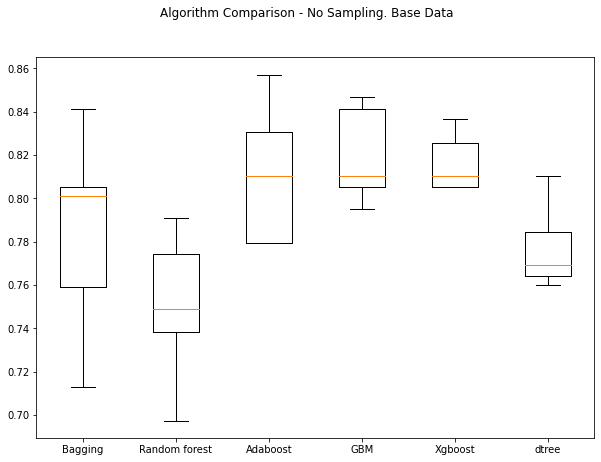

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison - No Sampling. Base Data")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that GradientBoostingClassifier is giving the highest cross-validated recall followed by XGBoost and Adaboost.
- After further analysis with ober and undersampled data we can take call which model to hypertune. 

### Model building - Oversampled data
Oversampling Techniques

 - Random Oversampling
 - Synthetic Minority Oversampling Technique (SMOTE)
 - Borderline-SMOTE
 - Borderline Oversampling with SVM
 - Adaptive Synthetic Sampling (ADASYN)

#### Oversampling - SMOTE
- Synthetic Minority Oversampling Technique (SMOTE) - SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample as a point along that line.

In [ ]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
#Build the model with oversampled data on training set. Model performance is calculated using validation set.
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
model_with_train_perf_on_validation(X_train_over, y_train_over, y_val, X_val,results,names)


Cross-Validation Performance:

Bagging: 95.5090149897054
Random forest: 97.15634320460275
Adaboost: 96.09742346398814
GBM: 96.92108757143683
Xgboost: 96.94065693009296
dtree: 93.80278627643402

Validation Performance:

Bagging: 0.8282208588957055
Random forest: 0.8312883435582822
Adaboost: 0.8588957055214724
GBM: 0.8834355828220859
Xgboost: 0.8803680981595092
dtree: 0.7791411042944786


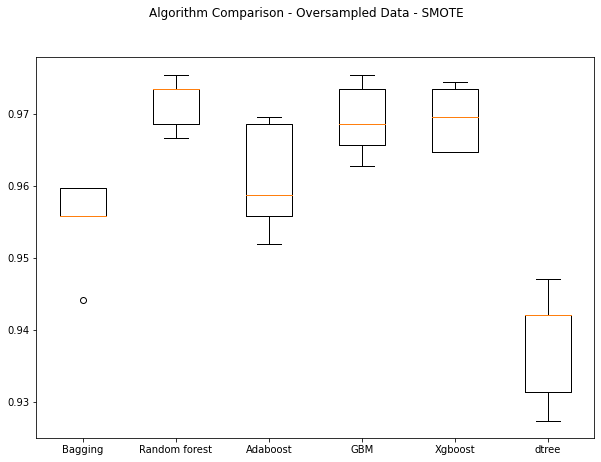

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison - Oversampled Data - SMOTE")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- We can see that GradientBoostingClassifier is giving the highest cross-validated recall followed by XGBoost and Randome Forest on oversampled data.

#### Oversampling - ADASYN
 - Adaptive Synthetic Sampling (ADASYN) -  (ADASYN) is another extension to SMOTE that generates synthetic samples inversely proportional to the density of the examples in the minority class. It is designed to create synthetic examples in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high.

In [ ]:
# Fit ADASYN on train data(Synthetic Minority Oversampling Technique)
ada_oversamp_tech = ADASYN(random_state=1)
X_train_over_ADASYN, y_train_over_ADASYN = ada_oversamp_tech.fit_resample(X_train, y_train)

In [ ]:
#Build the model with oversampled data on training set. Model performance is calculated using validation set.
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
model_with_train_perf_on_validation(X_train_over_ADASYN, y_train_over_ADASYN, y_val, X_val,results,names)


Cross-Validation Performance:

Bagging: 95.35546046990581
Random forest: 97.29080638028861
Adaboost: 96.10929451845763
GBM: 97.04628262859917
Xgboost: 97.1481986667248
dtree: 93.90928662925525

Validation Performance:

Bagging: 0.8466257668711656
Random forest: 0.8159509202453987
Adaboost: 0.852760736196319
GBM: 0.8742331288343558
Xgboost: 0.8803680981595092
dtree: 0.7607361963190185


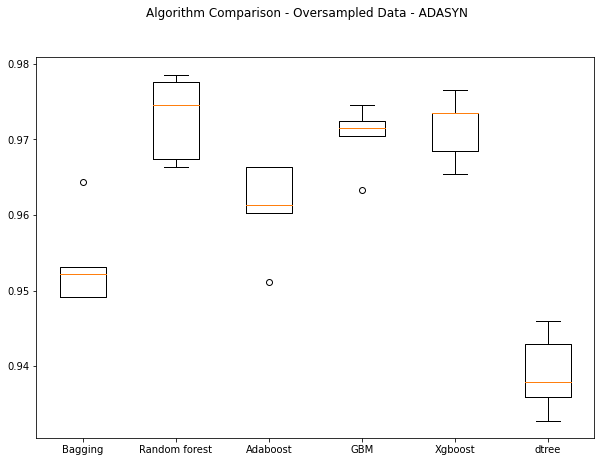

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison - Oversampled Data - ADASYN")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()# Plotting boxplots for CV scores of all models defined above


- We can see that Random Forest is giving the highest cross-validated recall followed by XGBoost and GradientBoostingClassifier on oversampled data.

### Model building - Undersampled data
Undersampling Techniques

 - Random Undersampling
 - Condensed Nearest Neighbor Rule (CNN)
 - Near Miss Undersampling
 - Tomek Links Undersampling
 - Edited Nearest Neighbors Rule (ENN)
 - One-Sided Selection (OSS)
 - Neighborhood Cleaning Rule (NCR)

#### Undersampling - RandomUnderSampler
 - The simplest undersampling method involves randomly deleting examples from the majority class in the training dataset, referred to as random undersampling.

In [ ]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
# fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
#Build the model with oversampled data on training set. Model performance is calculated using validation set.
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
model_with_train_perf_on_validation(X_train_un, y_train_un, y_val, X_val,results,names)


Cross-Validation Performance:

Bagging: 90.36996336996337
Random forest: 92.82940868655155
Adaboost: 92.82993197278913
GBM: 93.95552066980638
Xgboost: 94.26373626373626
dtree: 87.91156462585035

Validation Performance:

Bagging: 0.9325153374233128
Random forest: 0.9233128834355828
Adaboost: 0.950920245398773
GBM: 0.9601226993865031
Xgboost: 0.9631901840490797
dtree: 0.9171779141104295


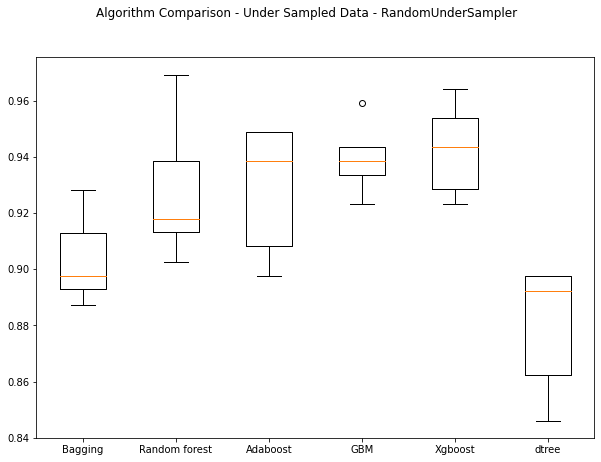

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison - Under Sampled Data - RandomUnderSampler")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- We can see that XGBoost is giving the highest cross-validated recall followed by GradientBoostingClassifier, Random Forest and AdaBoost on under sampled data.

#### Undersampling - Tomek Links Undersampling
- A Tomek Link refers to a pair of examples in the training dataset that are both nearest neighbors (have the minimum distance in feature space) and belong to different classes. Tomek Links are often misclassified examples found along the class boundary and the examples in the majority class are deleted.

In [ ]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
# fit random under sampler on the train data
tomek_under_sample = TomekLinks(sampling_strategy='majority')
X_train_un_tomek, y_train_un_tomek = tomek_under_sample.fit_resample(X_train, y_train)

In [ ]:
#Build the model with oversampled data on training set. Model performance is calculated using validation set.
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
model_with_train_perf_on_validation(X_train_un_tomek, y_train_un_tomek, y_val, X_val,results,names)


Cross-Validation Performance:

Bagging: 80.52956567242282
Random forest: 77.76190476190476
Adaboost: 82.99215070643642
GBM: 83.70434327577185
Xgboost: 83.80638409209837
dtree: 77.96807953950811

Validation Performance:

Bagging: 0.8374233128834356
Random forest: 0.8220858895705522
Adaboost: 0.8742331288343558
GBM: 0.8619631901840491
Xgboost: 0.8803680981595092
dtree: 0.8558282208588958


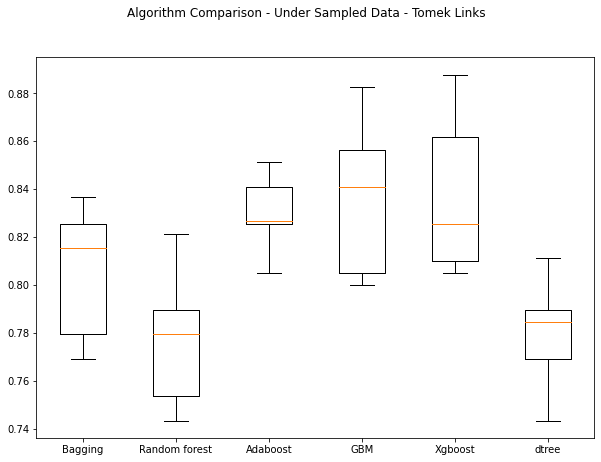

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison - Under Sampled Data - Tomek Links")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- RandomUnderSampler gives better result then TomekLinks undersampler.

##  Tuning  model 

###  Hyperparameter Tuning 

* Based on Cross-Validation Performance for different models with over and undersampled data, deciding to tune following models using ADASYN oversampled data as ADASYN models gave better peformance then other models in Cross-Validation.
 - Random forest
 - Xgboost
 - GBM

* Oversampling - SMOTE
 - Random forest: 97.15634320460275
 - Xgboost: 96.94065693009296
 - GBM: 96.92108757143683

* Oversampling - ADASYN
 - Random forest: 97.29080638028861
 - Xgboost: 97.1481986667248
 - GBM: 97.04628262859917

* Undersampling - RandomUnderSampler
 - Xgboost: 94.26373626373626
 - GBM: 93.95552066980638
 - Random forest: 92.82940868655155

**First, let's create two functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

The following model performance classification function will return the accuracy, recall, precision and F1 score. 

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

The following function will return the confusion matrix for a model

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
def featureImportancePlot(modelInput):
  importances = modelInput.feature_importances_
  indices = np.argsort(importances)
  feature_names = list(X.columns)

  plt.figure(figsize=(12,12))
  plt.title('Feature Importances')
  plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
  plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

##   Random Forest 

Let's tune Random Forest Model using **RandomizedSearch**

We define certain hyperparameters and RandomizedSearchCV build model using few possible combination of the hyperparameters defined.It returns the best combination of the hyperparameters.

**Grid Search**

In [ ]:
# Checking all available tuning parameters for RandomForestClassifier
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
%%time 

# Creating pipeline
rf_random = RandomForestClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV
# Grid of parameters to choose from
param_grid = {'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)
                }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=rf_random, param_distributions=param_grid, n_jobs = -1, n_iter=10, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over_ADASYN,y_train_over_ADASYN)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 60, 'min_samples_split': 12, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 15} with CV score=0.9244370119853592:
CPU times: user 1.4 s, sys: 123 ms, total: 1.52 s
Wall time: 31.9 s


In [ ]:
# Tuning model with best parameters
rf_random_tuned = RandomForestClassifier(random_state=1, max_features='log2', criterion="entropy", max_depth=15, min_samples_split=12, min_samples_leaf=6, n_estimators=60)

# Fit the model on training data
rf_random_tuned.fit(X_train_over_ADASYN,y_train_over_ADASYN)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       min_samples_leaf=6, min_samples_split=12,
                       n_estimators=60, random_state=1)

**Checking model performance**

In [ ]:
# Calculating different metrics on validation set
rf_random_tuned_val_perf = model_performance_classification_sklearn(rf_random_tuned, X_val, y_val)
print("Validation performance:")
rf_random_tuned_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.947,0.816,0.847,0.831


In [ ]:
# Calculating different metrics on validation set
rf_random_tuned_test_perf = model_performance_classification_sklearn(rf_random_tuned, X_test, y_test)
print("Test performance:")
rf_random_tuned_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.947,0.828,0.838,0.833


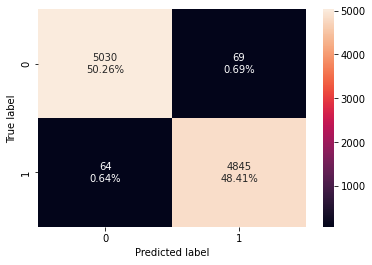

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(rf_random_tuned, X_train_over_ADASYN, y_train_over_ADASYN)

####  Observations 
- Model is not overfitting. 
- Random forest model on validation/test dataset is giving recall value of around 82%.
- The model is doing fair in identifying Attrited customer with .64% error. 

##   XGBoost 

In [ ]:
XGBClassifier().get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
%%time 

#defining model
xgb = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_jobs = -1, n_iter=10, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over_ADASYN,y_train_over_ADASYN)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.9975558005360504:
CPU times: user 822 ms, sys: 47.1 ms, total: 869 ms
Wall time: 30.1 s


In [ ]:
# building model with best parameters
xgb_tuned1 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    subsample=1,
    learning_rate=0.05,
    gamma=1,
    eval_metric="logloss",
    reg_lambda=10,
    max_depth=2,
)
# Fit the model on training data
xgb_tuned1.fit(X_train_over_ADASYN, y_train_over_ADASYN)

XGBClassifier(eval_metric='logloss', gamma=1, learning_rate=0.05, max_depth=2,
              n_estimators=50, random_state=1, reg_lambda=10,
              scale_pos_weight=10)

**Checking model performance**

In [ ]:
# Calculating different metrics on validation set
xgb_tuned1_val_perf = model_performance_classification_sklearn(xgb_tuned1, X_val, y_val)
print("Validation performance:")
xgb_tuned1_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.645,0.994,0.311,0.474


In [ ]:
# Calculating different metrics on validation set
xgb_tuned1_test_perf = model_performance_classification_sklearn(xgb_tuned1, X_test, y_test)
print("Test performance:")
xgb_tuned1_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.621,1.000,0.298,0.459


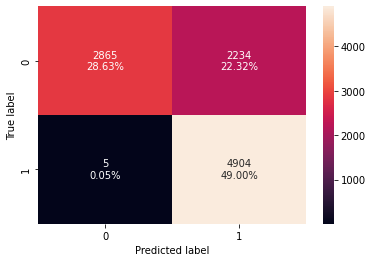

In [ ]:
confusion_matrix_sklearn(xgb_tuned1, X_train_over_ADASYN, y_train_over_ADASYN)

####  Observations 
- XGB tuned model is giving very high recall on validation and test set. But Accuracy is comparetively low.
- The model has very low precision score.

##   Gradien Boost 

In [ ]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
%%time 

#defining model
gb = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid={'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10),
                'ccp_alpha':[0,1,3,5],
                'learning_rate':[0.01,0.1,0.2,0.05]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=gb, param_distributions=param_grid, n_jobs = -1, n_iter=10, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over_ADASYN,y_train_over_ADASYN)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 30, 'min_samples_split': 17, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15, 'learning_rate': 0.2, 'ccp_alpha': 0} with CV score=0.9071274791299455:
CPU times: user 2.4 s, sys: 93 ms, total: 2.49 s
Wall time: 1min 53s


In [ ]:
# building model with best parameters
gb_tuned = GradientBoostingClassifier(
    random_state=1,
    n_estimators= 30, 
    min_samples_split= 17, 
    min_samples_leaf= 1, 
    max_features= 'log2', 
    max_depth= 15, 
    learning_rate= 0.2, 
    ccp_alpha= 0
)


# Fit the model on training data
gb_tuned.fit(X_train_over_ADASYN, y_train_over_ADASYN)

GradientBoostingClassifier(ccp_alpha=0, learning_rate=0.2, max_depth=15,
                           max_features='log2', min_samples_split=17,
                           n_estimators=30, random_state=1)

**Checking model performance**

In [ ]:
# Calculating different metrics on validation set
gb_tuned_val_perf = model_performance_classification_sklearn(gb_tuned, X_val, y_val)
print("Validation performance:")
gb_tuned_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.952,0.813,0.877,0.844


In [ ]:
# Calculating different metrics on validation set
gb_tuned_test_perf = model_performance_classification_sklearn(gb_tuned, X_test, y_test)
print("Test performance:")
gb_tuned_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.952,0.818,0.872,0.844


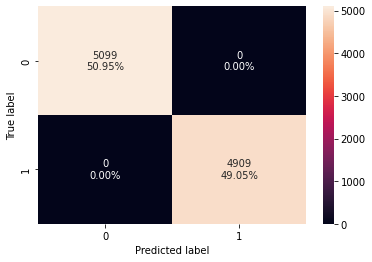

In [ ]:
confusion_matrix_sklearn(gb_tuned, X_train_over_ADASYN, y_train_over_ADASYN)

####  Observations 
- GradientBoost tuned model is giving acceptable Recall with good accuracy.
- The model has good precision and F1 score.
- All numbers here indicating that this model is performing better job then other mdoels.

###  Comparing all models 

In [ ]:
# Validation Set performance comparison with Random search

models_validation_comp_df = pd.concat(
    [
        rf_random_tuned_val_perf.T,
        xgb_tuned1_val_perf.T,
        gb_tuned_val_perf.T,
    ],
    axis=1,
)
models_validation_comp_df.columns = [
    "Random Forest Tuned",
    "Xgboost Tuned",
    "Gradient Boost",
]
print("Validation set performance comparison:")
models_validation_comp_df

Validation set performance comparison:


,Random Forest Tuned,Xgboost Tuned,Gradient Boost
Accuracy,0.947,0.645,0.952
Recall,0.816,0.994,0.813
Precision,0.847,0.311,0.877
F1,0.831,0.474,0.844


In [ ]:
# Test Set performance comparison  with Random search

models_test_comp_df = pd.concat(
    [
        rf_random_tuned_test_perf.T,
        xgb_tuned1_test_perf.T,
        gb_tuned_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Random Forest Tuned",
    "Xgboost Tuned",
    "Gradient Boost",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Random Forest Tuned,Xgboost Tuned,Gradient Boost
Accuracy,0.947,0.621,0.952
Recall,0.828,1.000,0.818
Precision,0.838,0.298,0.872
F1,0.833,0.459,0.844


####  Observations 
- Based on comparision of validation and test scores, Gradient Boost and Random Forest both seems to giving similar performance. 
- Going ahead with Gradient Boost model and finalizing this model for this uses as it has all other scores good. 

### Feature Importance Using Sklearn 

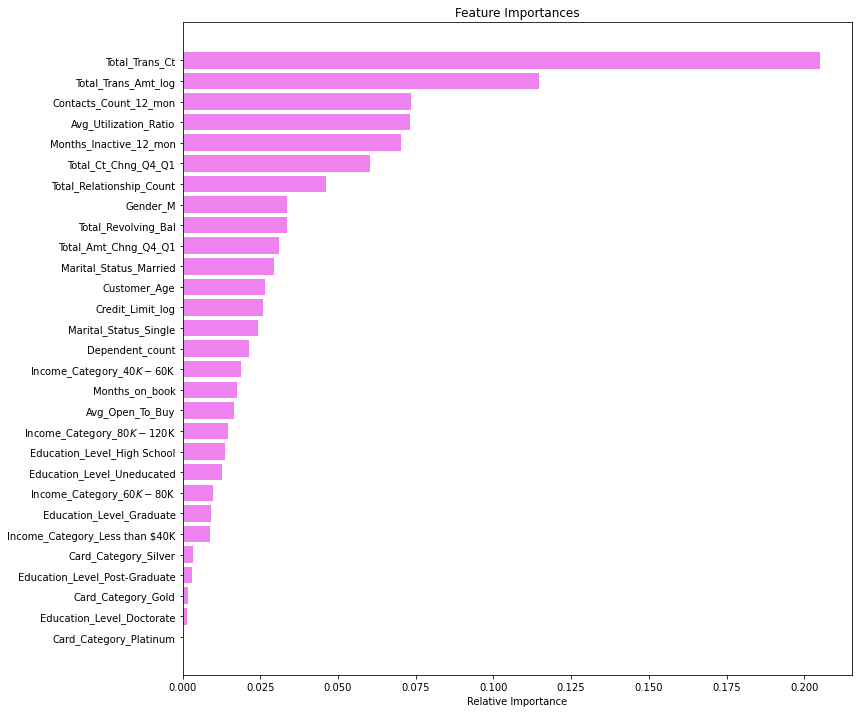

In [ ]:
feature_names = X.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

####  Observations 
- Total Transaction Count is the most important feature, followed by Total Transaction amount log and Contacting contact in last 12 months.

##  Pipelines for productionizing the model 

- Pipeline is a means of automating the machine learning workflow by enabling data to be transformed and correlated into a model that can then be analyzed to achieve outputs. This type of ML pipeline makes the process of inputting data into the ML model fully automated. 

- Now, we have a final model. let's use pipelines to put the model into production


###   Column Transformer 
* We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns
* Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.


We will create 2 different pipelines, one for numerical columns and one for categorical columns. For numerical columns, we will do missing value imputation as pre-processing. For categorical columns, we will do one hot encoding and missing value imputation as pre-processing
We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [ ]:
data_forPipeline.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit_log,Total_Trans_Amt_log
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.000,5,1.000,3.000,777,11914.000,1.201,42,1.172,0.061,9.449,7.042
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.000,6,1.000,2.000,864,7392.000,1.201,33,1.172,0.105,9.019,7.163
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.000,4,1.000,0.500,0,3418.000,1.201,20,1.172,0.000,8.137,7.543
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34.000,3,4.000,1.000,2517,796.000,1.201,20,1.172,0.760,8.106,7.066
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.000,5,1.000,0.500,0,4716.000,1.201,28,1.172,0.000,8.459,6.704


In [ ]:
# creating a list of numerical variables
numerical_features = [ 
 'Customer_Age', 
 'Dependent_count', 
 'Months_on_book', 
 'Total_Relationship_Count', 
 'Months_Inactive_12_mon', 
 'Contacts_Count_12_mon', 
 'Credit_Limit_log', 
 'Total_Revolving_Bal', 
 'Avg_Open_To_Buy', 
 'Total_Amt_Chng_Q4_Q1', 
 'Total_Trans_Amt_log', 
 'Total_Trans_Ct', 
 'Total_Ct_Chng_Q4_Q1', 
 'Avg_Utilization_Ratio'
 ]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


### Model with pipeline

In [ ]:
# Separating target variable and other variables
X = data_forPipeline.drop(["Attrition_Flag"], axis=1)
Y = data_forPipeline["Attrition_Flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)

- Now we already know the best model we need to process with, so we don't need to divide data into 3 sets - train, validation and test

In [ ]:
# Splitting data into training, validation and test set: first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [ ]:
# Creating new pipeline with best parameters
gb_model_pipe = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GB",
            GradientBoostingClassifier(
            random_state=1,
            n_estimators= 30, 
            min_samples_split= 17, 
            min_samples_leaf= 1, 
            max_features= 'log2', 
            max_depth= 15, 
            learning_rate= 0.2, 
            ccp_alpha= 0
          )
        ),
    ]
)
# Fit the model on training data
gb_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit_log',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                        

In [ ]:
# transforming and predicting on test data
gb_model_pipe.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# Calculating different metrics on validation set
gb_tuned_val_perf_pipe = model_performance_classification_sklearn(gb_model_pipe, X_val, y_val)
print("Validation performance:")
gb_tuned_val_perf_pipe

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.961,0.813,0.933,0.869


In [ ]:
# Calculating different metrics on validation set
gb_tuned_test_perf_pipe = model_performance_classification_sklearn(gb_model_pipe, X_test, y_test)
print("Test performance:")
gb_tuned_test_perf_pipe

Test performance:


,Accuracy,Recall,Precision,F1
0,0.958,0.809,0.920,0.861


## Business recommendations and insights

- Used on correlation it has been observed that there are comparatively more “Female” Attrited Customers than “Male”. Company should understand reasoning behind this by collecting more data in the form of survey from Attrited Female Customers. 
- Customers with “Graduate” level education tend to renounce their credit cards more than any other category. Company need to focus more in this area to find root cause. 
- In Income_Category less than 40K, there are more attrition. Reason may be because there are more customer in that income category range. This category seems to be important as there are many customers in this category. And there are good chances that individuals in this category prefer to use balance transfer and other credit card feature more than other categories and can pay back.
- Blue is Card Category is owned by largest number of customer base - 93.2%. More focus should be given to this category to avoid attrition of customer in this area.
- Customers with less Avg_Utilization_Ratio tend to renounce card compare to higher Avg_Utilization_Ratio. With better offers(cash back or no charge balance transfer), customers can be engaged more to increase card utilization and hence reduce attrition.
- Total Transaction Count is the most important feature, followed by Total Transaction amount log and Contacting contact in last 12 months. Company can keep on on usage pattern by user and engage users with more transactions with better offer.